In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load the data
data_test = pd.read_csv(r"titanic_test.csv")
data_train = pd.read_csv(r"titanic_train.csv")

In [5]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
data_train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
print("contact loc.bs21don038@spjain.org")

contact loc.bs21don038@spjain.org


In [12]:
data_total= pd.concat([data_train, data_test], ignore_index=True, axis=0)
data_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [13]:
data_total.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [14]:
data_total

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [15]:
data_total[data_total["Cabin"].notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1296,NaN,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
1296,1297,NaN,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
1298,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
1302,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


In [16]:
# Todo
# 1. Check for missing data of age and cabin
# 2. Fillna with average for age
# 3. Drop cabin
# 4. Dropna for embarked
# 5. Get title, get cabin letter, analyze ticket
# 6. Get dummies for sex and embark
# 7. Build log reg, classification tree, random forest, svm, knn
# 8. Confusion matrix, accuracy, precision, recall, f1 score, cross validation


In [17]:
# Approach 1: Drop all NaN values for Survived, Fillna for Age, Drop Cabin, Dropna for Embarked
data_total1 = data_total.copy()
data_total1 = data_total1.dropna(subset = "Survived", axis=0)
data_total1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


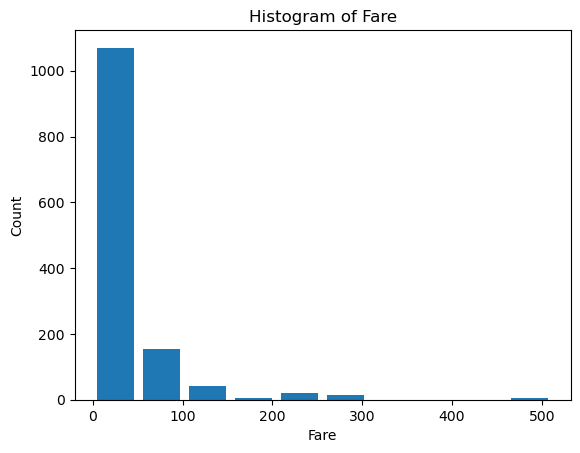

In [18]:
data_total['Fare'].plot(kind='hist', rwidth=0.8)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Histogram of Fare')
plt.show()


In [21]:
data_total1["Fare"].describe()
IQR = data_total1["Fare"].quantile(0.75) - data_total1["Fare"].quantile(0.25)
print(data_total1["Fare"].quantile(0.25) - 3*IQR, data_total1["Fare"].quantile(0.75) + 3*IQR)

-46.416799999999995 80.3126


<Axes: ylabel='Frequency'>

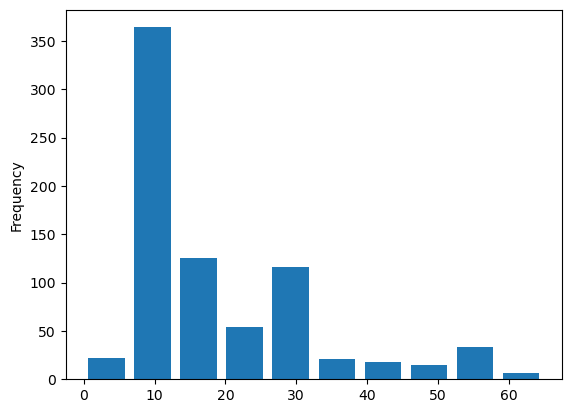

In [23]:
# Dropping the outliers
data_total1 = data_total1[data_total1["Fare"] < 100]
data_total1["Fare"].plot(kind='hist', rwidth=0.8)

<Axes: ylabel='Frequency'>

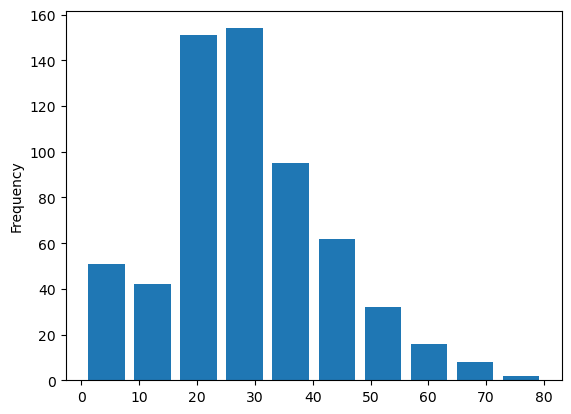

In [24]:
data_total1["Age"].plot(kind='hist', rwidth=0.8)

In [28]:
data_total1["Age"].fillna(data_total1["Age"].mean(), inplace=True)
data_total1.drop("Cabin", axis=1, inplace=True)
data_total1.dropna(subset = ["Embarked"], axis=0, inplace=True)
data_total1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  775 non-null    int64  
 1   Survived     775 non-null    float64
 2   Pclass       775 non-null    int64  
 3   Name         775 non-null    object 
 4   Sex          775 non-null    object 
 5   Age          775 non-null    float64
 6   SibSp        775 non-null    int64  
 7   Parch        775 non-null    int64  
 8   Ticket       775 non-null    object 
 9   Fare         775 non-null    float64
 10  Embarked     775 non-null    object 
dtypes: float64(3), int64(4), object(4)
memory usage: 72.7+ KB


In [35]:
data_total1.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [43]:
data_total1.sort_values(by="Ticket")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
475,476,0.0,1,"Clifford, Mr. George Quincy",male,28.946574,0,0,110465,52.000,S
110,111,0.0,1,"Porter, Mr. Walter Chamberlain",male,47.000000,0,0,110465,52.000,S
430,431,1.0,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.000000,0,0,110564,26.550,S
170,171,0.0,1,"Van der hoef, Mr. Wyckoff",male,61.000000,0,0,111240,33.500,S
462,463,0.0,1,"Gee, Mr. Arthur H",male,47.000000,0,0,111320,38.500,S
...,...,...,...,...,...,...,...,...,...,...,...
147,148,0.0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.000000,2,2,W./C. 6608,34.375,S
736,737,0.0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.000000,1,3,W./C. 6608,34.375,S
235,236,0.0,3,"Harknett, Miss. Alice Phoebe",female,28.946574,0,0,W./C. 6609,7.550,S
92,93,0.0,1,"Chaffee, Mr. Herbert Fuller",male,46.000000,1,0,W.E.P. 5734,61.175,S


In [70]:
separated = data_total1[data_total1["Ticket"].str.split(" ", expand=True)[0].str.isnumeric() == False]["Ticket"].str.split(" ", expand = True)
separated

,0,1,2
0,A/5,21171,None
2,STON/O2.,3101282,None
10,PP,9549,None
12,A/5.,2151,None
30,PC,17601,None
...,...,...,...
867,PC,17590,None
874,P/PP,3381,None
883,C.A./SOTON,34068,None
884,SOTON/OQ,392076,None


In [77]:
def check_and_assign(row):
    if pd.to_numeric(row[1], errors='coerce') != None:
        return row[1]
    else:
        return row[2]

In [78]:
separated["Number"] = separated.apply(check_and_assign, axis=1)

In [80]:
separated["Number"] = 

,0,1,2,Number
count,178,174,13,174
unique,41,133,13,133
top,C.A.,2.,3101294,2.
freq,27,12,1,12


In [37]:
X = data_total1.drop(["Survived", "PassengerId"], axis=1)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,3,"Moran, Mr. James",male,28.946574,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.946574,1,2,W./C. 6607,23.4500,S
889,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [33]:
X.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [46]:
test = "sdfs"
test.split(" ")

['sdfs']